In [84]:
import pandas as pd
from collections import defaultdict,OrderedDict
def change_time_format(time):
    time = time.replace("年","-").replace("月","-").replace("日","").replace("時",":").replace("分",":").replace("秒","")
    year = int(time.split("-")[0])
    time = time.replace(str(year),str(year+1911))
    time = time.split()
    ac_time = time[1].split(":")
    if int(ac_time[1]) > 0:
        ac_time[1] = "00"
        ac_time[0] = str(int(ac_time[0])+1)
    if len(ac_time[0]) < 2:
        ac_time[0] = "0" + ac_time[0]
    if ac_time[0] == '24':
        return time[0]+" "+"23"+":00:00"
    else:
        return time[0]+" "+ac_time[0]+":00:00"

def get_weather_data(district):
    import os
    path = "data/weather/all_data"
    all_weather = {}
    for filename in os.listdir(path):
        all_weather[filename.replace(".csv","")] = pd.read_csv(path+"/"+filename)
    DataWithWeather = []
    # 雨量
    all_rain =  defaultdict(list)
    # 風速
    all_WS = defaultdict(list)
    # 最大陣風
    all_WSGust = defaultdict(list)
    T_time = []
    for i in district["發生時間"].to_list():
        T_time.append(change_time_format(i))
    for i in range(0,len(district["測站"].to_list())):
        try:
            a = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Unnamed: 18"].to_list().index(T_time[i])
            # print(a)
            precp = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list()[a]
            if precp == "t" or precp == "T" or precp == "&" or precp == "X":
                precp = float(0.0)
            WS = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list()[a]
            if WS == "/" or WS == "X" or WS == "...":
                WS = float(0.0)
            WSGust = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list()[a]
            if WSGust == "..." or WSGust == "X":
                WSGust = float(0.0)
            DataWithWeather.append([float(precp),float(WS),float(WSGust)])
            all_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
            all_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
            all_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
        except KeyError:
            DataWithWeather.append(["err"])
        except ValueError:
            DataWithWeather.append(["err"])
    return all_rain,all_WS,all_WSGust

In [85]:
Taipei =  pd.read_csv("data/updated/fixed_1_Taipei.csv")
New_Taipei =  pd.read_csv("data/updated/fixed_NewTaipei.csv")
Taoyuan = pd.read_csv("data/updated/fixed_Taoyuan.csv")
Tainan = pd.read_csv("data/updated/fixed_Tainan.csv")
Kaohsiung = pd.read_csv("data/updated/fixed_Kaohsiung.csv")

In [86]:
def draw(weather_data):
    clear_data = defaultdict()
    temp = []
    for i in weather_data.keys():
        temp.append(i)
    y = []
    for i in temp:
        for j in weather_data[i]:
            if j not in clear_data.keys():
                clear_data[j] = 1
            else:
                clear_data[j] += 1
    x = list(OrderedDict(sorted(clear_data.items())))
    for i in x:
        y.append(clear_data[i])
    # print(x)
    # print(y)
    # 以下可以開始畫圖
    import matplotlib.pyplot as plt
    plt.bar(x,y)
    plt.show()
    
# draw(all_WS)

### 台北

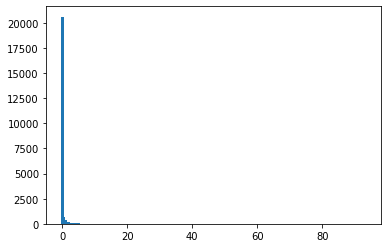

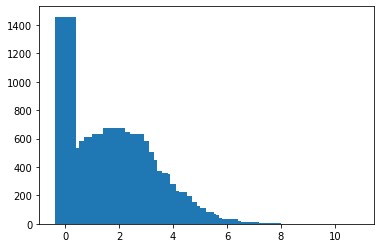

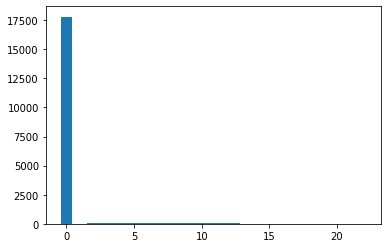

In [87]:
all_rain,all_WS,all_WSGust = get_weather_data(Taipei)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)

### 新北

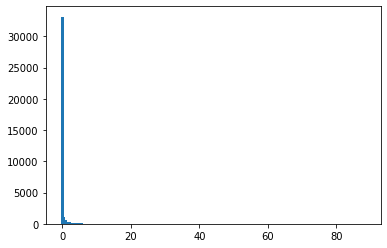

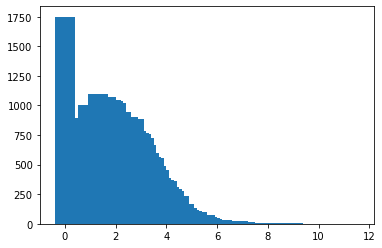

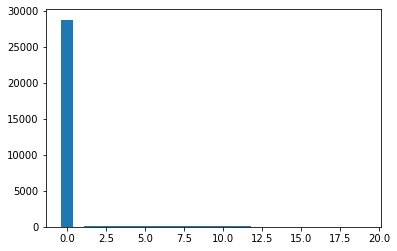

In [88]:
all_rain,all_WS,all_WSGust = get_weather_data(New_Taipei)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)

### 桃園

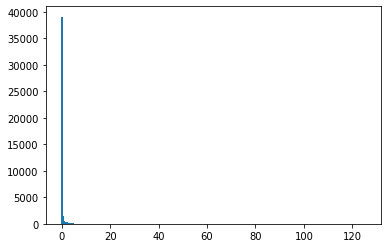

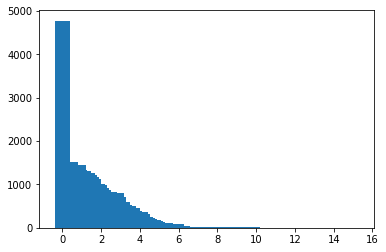

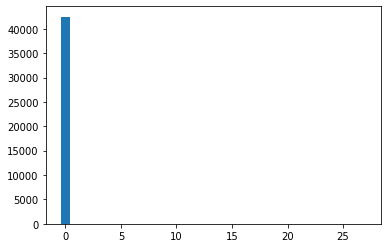

In [89]:
all_rain,all_WS,all_WSGust = get_weather_data(Taoyuan)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)

### 台南

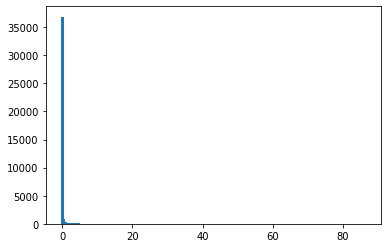

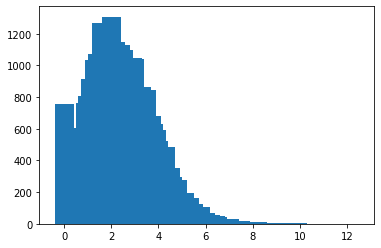

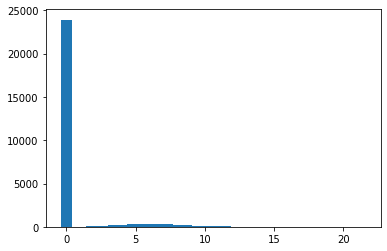

In [90]:
all_rain,all_WS,all_WSGust = get_weather_data(Tainan)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)

### 高雄

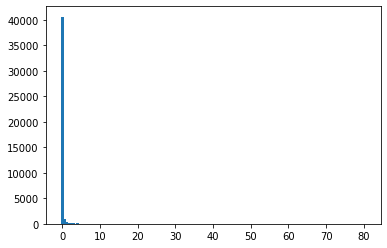

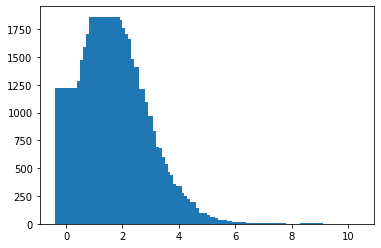

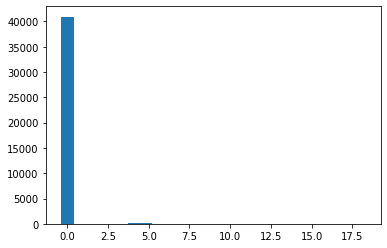

In [91]:
all_rain,all_WS,all_WSGust = get_weather_data(Kaohsiung)
draw(all_rain)
draw(all_WS)
draw(all_WSGust)